In [82]:
import numpy
import zpp
%matplotlib inline
from pylab import *

import os
import importlib

importlib.reload(zpp)

import astropy
from scipy.ndimage.measurements import center_of_mass as com

In [83]:
def bin_ndarray(ndarray, new_shape, operation='sum'):
    """
    Bins an ndarray in all axes based on the target shape, by summing or
        averaging.

    Number of output dimensions must match number of input dimensions and 
        new axes must divide old ones.

    Example
    -------
    >>> m = np.arange(0,100,1).reshape((10,10))
    >>> n = bin_ndarray(m, new_shape=(5,5), operation='sum')
    >>> print(n)

    [[ 22  30  38  46  54]
     [102 110 118 126 134]
     [182 190 198 206 214]
     [262 270 278 286 294]
     [342 350 358 366 374]]

    """
    operation = operation.lower()
    if not operation in ['sum', 'mean']:
        raise ValueError("Operation not supported.")
    if ndarray.ndim != len(new_shape):
        raise ValueError("Shape mismatch: {} -> {}".format(ndarray.shape,
                                                           new_shape))
    compression_pairs = [(d, c//d) for d,c in zip(new_shape,
                                                  ndarray.shape)]
    flattened = [l for p in compression_pairs for l in p]
    ndarray = ndarray.reshape(flattened)
    for i in range(len(new_shape)):
        op = getattr(ndarray, operation)
        ndarray = op(-1*(i+1))
    return ndarray


In [88]:
path = "/Users/npk/Dropbox/Local Volume Mapper/Spectrograph/simulations/1-sep-2018/"

In [89]:
files = os.listdir(path)

In [90]:
len(files)

97

In [91]:
waves = [.566, .6347, .7033, .772]
fields = [0., 12., 24., 36., 48., 60.]
ds = [0, 0.017, 0.033, 0.05]

In [163]:

res = {}
for file in files:
    if file[0] != "W": continue
       
    sp = file.split("_")
    key = tuple(map(float,(sp[0][1:], sp[1][1:], sp[2][2:])))
    print(key)
    meta,img = zpp.read_image_analysis(path + file)
    
    c = np.round(com(img)).astype(np.int) - 125
    rolledimg = np.roll(img, -c, (0,1))
    
    res[key] = (meta, rolledimg)
        

(0.772, 0.0, 0.0)
(0.566, 48.0, 0.0017)
(0.566, 36.0, 0.0033)
(0.772, 12.0, 0.0033)
(0.7033, 48.0, 0.0033)
(0.772, 60.0, 0.005)
(0.7033, 36.0, 0.0017)
(0.566, 60.0, 0.005)
(0.7033, 24.0, 0.005)
(0.6347, 60.0, 0.0)
(0.7033, 12.0, 0.0017)
(0.772, 48.0, 0.0017)
(0.566, 12.0, 0.0033)
(0.772, 36.0, 0.0033)
(0.7033, 24.0, 0.0033)
(0.6347, 0.0, 0.0017)
(0.566, 60.0, 0.0033)
(0.566, 12.0, 0.005)
(0.772, 36.0, 0.005)
(0.566, 24.0, 0.0017)
(0.6347, 12.0, 0.0)
(0.7033, 60.0, 0.0017)
(0.566, 36.0, 0.005)
(0.772, 24.0, 0.0017)
(0.772, 12.0, 0.005)
(0.6347, 36.0, 0.0)
(0.7033, 48.0, 0.005)
(0.772, 60.0, 0.0033)
(0.7033, 36.0, 0.005)
(0.566, 0.0, 0.0)
(0.772, 60.0, 0.0017)
(0.6347, 48.0, 0.0)
(0.772, 24.0, 0.0033)
(0.566, 48.0, 0.005)
(0.566, 24.0, 0.0033)
(0.7033, 60.0, 0.0033)
(0.772, 48.0, 0.005)
(0.6347, 0.0, 0.0033)
(0.7033, 12.0, 0.005)
(0.7033, 24.0, 0.0017)
(0.566, 60.0, 0.0017)
(0.6347, 24.0, 0.0)
(0.7033, 60.0, 0.005)
(0.772, 48.0, 0.0033)
(0.566, 24.0, 0.005)
(0.772, 36.0, 0.0017)
(0.566, 

In [179]:
def make_subplot(nrows, ncols, rownames, colnames, figsize=(15,9)):
    
    fig, axes = subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    for ax, col in zip(axes[0], colnames):
        ax.set_title(col)
    
    for ax, row in zip(axes[:,0], rownames):
        ax.set_ylabel(row)
        
    return axes
    

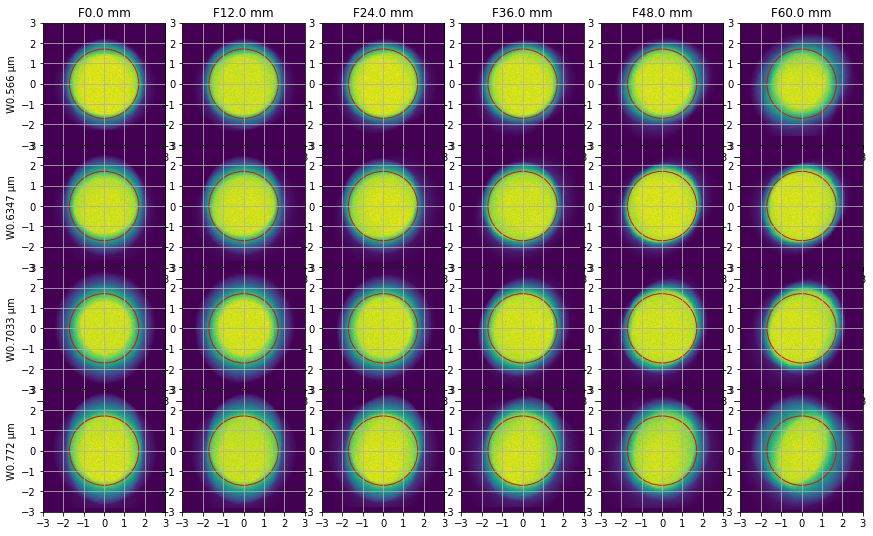

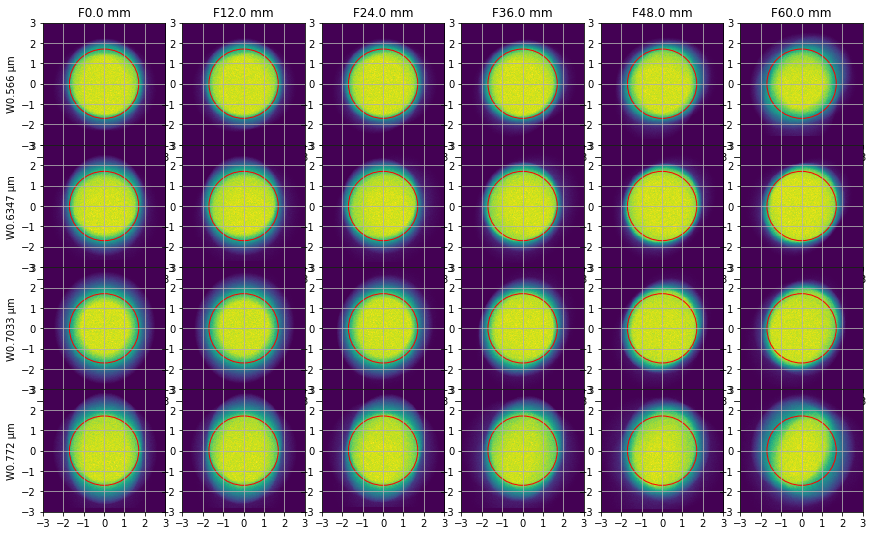

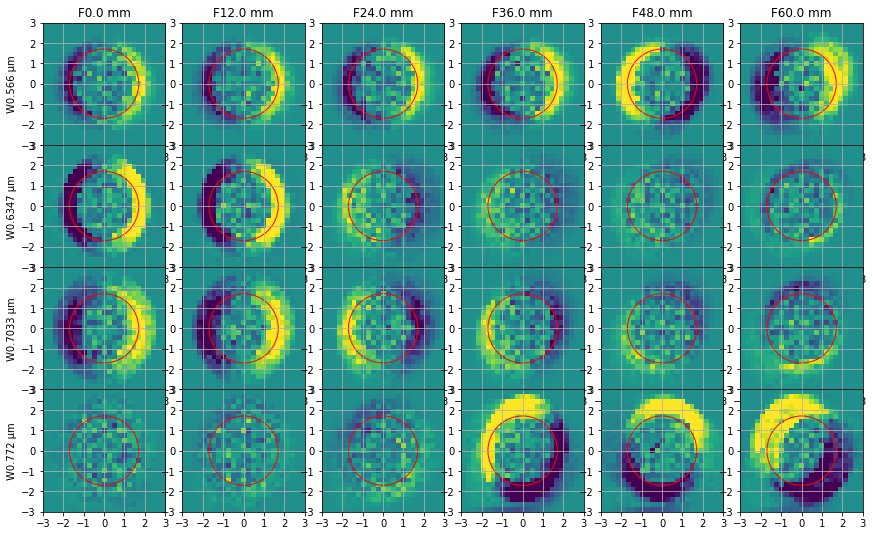

In [195]:

figsize = (12,15)

d1 = 0.0
d2 = 0.005

fnames = ["F%s mm" % field for field in fields]
wnames = ["W%s µm" % wave for wave in waves]
ticklocs = [-3,-2,-1,0,1,2,3]

axes = make_subplot(len(waves), len(fields), wnames, fnames)
imshow_opt = {"extent": [-3,3,-3,3]}
subplotsadjust_opt = {"wspace": 0, "hspace": 0}
for ix,w in enumerate(waves):
    for jx,f in enumerate(fields):
        img = res[(w,f,d1)][1]
        
        #subplot(len(waves), len(fields), cnt)
        axes[ix, jx].imshow(img, **imshow_opt)
        axes[ix,jx].add_artist(Circle((0,0), 1.7, fill=None, color='red'))
        axes[ix,jx].set_xticks(ticklocs)
        axes[ix,jx].grid(True)
        subplots_adjust(**subplotsadjust_opt)
        
axes = make_subplot(len(waves), len(fields), wnames, fnames)
for ix,w in enumerate(waves):
    for jx,f in enumerate(fields):
        img = res[(w,f,d2)][1]
        
        axes[ix,jx].imshow(img, **imshow_opt) 
        axes[ix,jx].add_artist(Circle((0,0), 1.7, fill=None, color='red'))
        axes[ix,jx].set_xticks(ticklocs)
        axes[ix,jx].grid(True)
        subplots_adjust(**subplotsadjust_opt)

        
        
axes = make_subplot(len(waves), len(fields), wnames, fnames)
for ix,w in enumerate(waves):
    for jx,f in enumerate(fields):
        img1 = res[(w,f,d1)][1]
        img2 = res[(w,f,d2)][1]
        
        d = img1-img2
        c1 = _(com(img1)) ; c2 = _(com(img2))
        distance = np.linalg.norm(c1-c2)
        if distance > 1:
            pass#axes[ix,jx].title("FIXME")
            
        axes[ix,jx].imshow(bin_ndarray(d, (25,25), operation='mean'), **imshow_opt, vmin=-4, vmax=4)        
        axes[ix,jx].add_artist(Circle((0,0), 1.7, fill=None, color='red'))
        axes[ix,jx].set_xticks(ticklocs)
        axes[ix,jx].grid(True)
        subplots_adjust(**subplotsadjust_opt)




(125.19131964765057, 125.26268644955982)

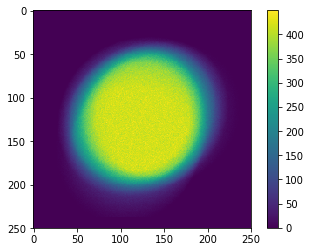

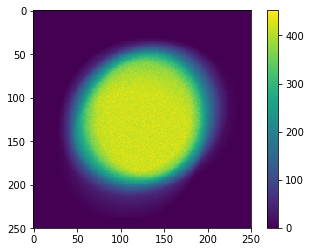

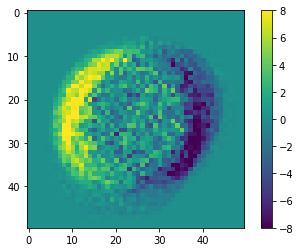

In [162]:
f = 48
w = 0.566
m,i1 = res[(w,f,0)]
m,i2 = res[(w,f,0.005)]

figure() ; imshow(i1) ; colorbar()
figure() ; imshow(i2) ; colorbar()
d = i1-i2
figure() ; imshow(bin_ndarray(i1-i2, (50,50), operation='mean'), vmin=-8, vmax=8) ; colorbar()

com(i1) 
com(i2)

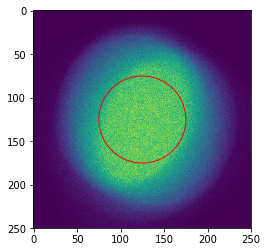

In [125]:
imshow(img)
gca().add_artist(Circle((125,125), 50, fill=None, color='red'))

In [121]:
?Circle